<a href="https://colab.research.google.com/github/rilianx/Documents/blob/main/InsertionSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Material adicional

### Algoritmo BubbleSort
Implementación del algoritmo **BubbleSort** sacada de [aquí](https://realpython.com/sorting-algorithms-python/#the-bubble-sort-algorithm-in-python). Se usará para comparar.

In [8]:
## https://realpython.com/sorting-algorithms-python/#the-bubble-sort-algorithm-in-python

def bubble_sort(array):
    n = len(array)

    for i in range(n):
        # Create a flag that will allow the function to
        # terminate early if there's nothing left to sort
        already_sorted = True

        # Start looking at each item of the list one by one,
        # comparing it with its adjacent value. With each
        # iteration, the portion of the array that you look at
        # shrinks because the remaining items have already been
        # sorted.
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                # If the item you're looking at is greater than its
                # adjacent value, then swap them
                array[j], array[j + 1] = array[j + 1], array[j]

                # Since you had to swap two elements,
                # set the `already_sorted` flag to `False` so the
                # algorithm doesn't finish prematurely
                already_sorted = False

        # If there were no swaps during the last iteration,
        # the array is already sorted, and you can terminate
        if already_sorted:
            break

    return array

### Profiling
Esta herramientas nos ayuda a analizar código en tiempo de ejecución.

In [9]:
!pip install line_profiler &> /dev/null
%load_ext line_profiler

! pip install memory_profiler &> /dev/null
%load_ext memory_profiler

### Write-and-run

In [15]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

# Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/rCFQeVM.png)


# InsertionSort

El algoritmo **InsertionSort** es similar a lo que hacemos cuando ordenamos una mano de cartas agregando una carta a la vez en nuestra mano y buscamos su posición correcta de **derecha a izquierda**. El siguiente código muestra una implementación del algoritmo.

In [66]:
## la siguiente linea guarda el código del bloque en el archivo insertion_sort.py
%%write_and_run insertion_sort.py
import random
from termcolor import colored
import copy

counter=0 # contador de comparaciones

def insertion_sort(a, verbose=False):
  global counter #variable global
  n=len(a)
  for i in range(1,n):
    #a[0..i-1] se encuentran ordenados
    key = a[i]
    if verbose==True: 
      print("-- Iteración",i,"--")
      print("Inicio iteración:",colored(f"{a[:i]}","blue"),colored(str(a[i]),"red"),colored(f"{a[i+1:]}","yellow") if i+1<n else '')

    key_placed=False
    for k in range(i-1,-1,-1): #i-1,i-2,...,0
      counter += 1
      if a[k]<key: 
        a[k+1]=key
        key_placed=True
        break
      a[k+1] = a[k]  #se mueve el nuevo elemento de derecha a izquierda

    if key_placed==False: a[k]=key; k=-1

    if verbose==True: print("Fin iteración   :",colored(f"{a[:i+1]}","blue"), colored(f"{a[i+1:]}","yellow") if i+1<n else '')

  return a


El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. Luego, los números se ordenan dentro de la misma lista.

1. Cuando comienza, se considera que sólo el primer elemento se encuentra ordenado, es decir, `a[0]`, y el resto de elementos son como las cartas boca abajo en la mesa.

2. Luego, para cada elemento `key=a[i]` con $i$ en el rango $(1..n)$:

  a.  El bucle de las lineas 17--23 busca la posición correcta para el elemento de **derecha a izquierda**. Para ello se recorre el arreglo desde la posición $i-1$ hasta la posición $0$ (linea 17) y se mueve a la derecha los elementos mayores a $key$ para *hacerle espacio* (linea 20).

  b. Si el elemento aun no se ha colocado (`key_placed==False`), se coloca al salir del bucle (linea 25).

Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

### Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[4,3,5,1]$

Pasamos directamente al segundo elemento ($3$), y lo ponemos es su poisición correcta, es decir a[0]:

$a=[3,4,5,1]$

Luego, el tercer elemento ya se encuentra en la posición correcta, por lo que pasaríamos al cuarto elemento ($1$) el que se movería hasta la primera posición del arreglo:

$a=[1,3,4,5]$

Y ya tenemos el arreglo ordenado.

### Ejecución del algoritmo paso a paso

A continuación se muestra el algoritmo en acción

In [67]:
import random
a = random.sample(range(1, 100), 8)
print("Entrada no ordenada:",a,"\n")
print("\nSalida ordenada:",insertion_sort(a,verbose=True))

Entrada no ordenada: [69, 30, 46, 63, 77, 67, 1, 73] 

-- Iteración 1 --
Inicio iteración: [69] 30 [46, 63, 77, 67, 1, 73]
Fin iteración   : [30, 69] [46, 63, 77, 67, 1, 73]
-- Iteración 2 --
Inicio iteración: [30, 69] 46 [63, 77, 67, 1, 73]
Fin iteración   : [30, 46, 69] [63, 77, 67, 1, 73]
-- Iteración 3 --
Inicio iteración: [30, 46, 69] 63 [77, 67, 1, 73]
Fin iteración   : [30, 46, 63, 69] [77, 67, 1, 73]
-- Iteración 4 --
Inicio iteración: [30, 46, 63, 69] 77 [67, 1, 73]
Fin iteración   : [30, 46, 63, 69, 77] [67, 1, 73]
-- Iteración 5 --
Inicio iteración: [30, 46, 63, 69, 77] 67 [1, 73]
Fin iteración   : [30, 46, 63, 67, 69, 77] [1, 73]
-- Iteración 6 --
Inicio iteración: [30, 46, 63, 67, 69, 77] 1 [73]
Fin iteración   : [1, 30, 46, 63, 67, 69, 77] [73]
-- Iteración 7 --
Inicio iteración: [1, 30, 46, 63, 67, 69, 77] 73 
Fin iteración   : [1, 30, 46, 63, 67, 69, 73, 77] 

Salida ordenada: [1, 30, 46, 63, 67, 69, 73, 77]


En cada iteración se puede apreciar el arreglo antes y despúes de colocar el nuevo elemento. El arreglo en azul es el que se encuentra ordenado y en amarillo los elementos que aun "no se agregan". En rojo, el nuevo elemento a agregar.

### Probando el código con pytest
La herramienta `pytest` es muy útil para probar si nuestro código es correcto. 

Primero creamos funciones de prueba o **tests** para verificar la correctitud del algoritmo (y los adjuntamos a nuestro archivo):

- `test_sort` verifica que luego de llamar a `insertion_sort`, el arreglo `a` esté ordenado.

- `test_same_elements` revisa que el arreglo ordenado (`a`) contenga los mismos elementos que el arreglo original (`b`).

In [68]:
%%write_and_run -a insertion_sort.py

def test_sort():
  for i in range(10): #generamos varios arreglos aleatorios para probar
    a = random.sample(range(1, 100), 5)
    a = insertion_sort(a)

    #verificamos que los elementos se encuentren ordenados de menor a mayor
    assert(all(a[i] <= a[i+1] for i in range(len(a) - 1)))

def test_same_elements():
  for i in range(10): #generamos varios arreglos aleatorios para probar
    a = random.sample(range(1, 100), 5)
    b = insertion_sort(copy.deepcopy(a))

    #comparamos el largo de los arreglos
    assert(len(a)==len(b))

    #verificamos que los elementos de a se encuentren en b
    for i in a: assert(i in b)

Luego ejecutamos la herramienta:

In [69]:
!pytest insertion_sort.py

============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 2 items                                                              

insertion_sort.py ..                                                     [100%]

=========================== 2 passed in 0.02 seconds ===========================


En caso de no pasar algún test, la herramienta nos indicará los problemas detectados.

# Tiempo de ejecución
Observando el código, podemos apreciar que el **peor caso** ocurriría si los elementos se encuentra ordenados de menor a mayor. En esta situación, para cada elemento $i$, el algoritmo debería recorrer el arreglo desde la posición $i$ hasta la posición $0$, ya que la posición correcta de cada elemento sería, de hecho, la posición $0$.

Por ejemplo:

In [70]:
a =[4,3,2,1]; counter = 0
print("Entrada no ordenada:",a)
print("Salida ordenada:",insertion_sort(a,True))
print("Total de comparaciones realizadas:",counter)

Entrada no ordenada: [4, 3, 2, 1]
-- Iteración 1 --
Inicio iteración: [4] 3 [2, 1]
Fin iteración   : [3, 4] [2, 1]
-- Iteración 2 --
Inicio iteración: [3, 4] 2 [1]
Fin iteración   : [2, 3, 4] [1]
-- Iteración 3 --
Inicio iteración: [2, 3, 4] 1 
Fin iteración   : [1, 2, 3, 4] 
Salida ordenada: [1, 2, 3, 4]
Total de comparaciones realizadas: 6


En este caso, la clave 3 tuvo que moverse una casilla, la clave 2, dos casillas y la clave 1, 3 casillas. OBserve que esto es igual al **número de comparaciones** que se realizaron dentro del método.

 En el caso general, se deberían realizar $\sum\limits_{i=0}^{n-1} i=\frac{n(n-1)}{2}$ operaciones. Por lo que el **tiempo de ejecución del algoritmo en el peor caso** es $O(n^2)$.

# Correctitud
En el comienzo de cada iteración del bucle más grande, el subarreglo a[0..i-1] corresponde a nuestra mano ordenada. El resto del arreglo: a[i,..,n-1] corresponde a las cartas boca abajo en la mesa. 

En la salida del método, el arreglo en azul correspondería a la mano ordenada, mientras que el resto de elementos serían las cartas boca abajo:

![image](https://i.imgur.com/fhbAEhD.png)

Queremos probar la siguiente **siguiente propiedad de bucle invariante** para el `insertion_sort`:

> Al comienzo de cada iteración del bucle más grande, el subarreglo a[0..i-1] contiene los **mismos elementos** que el arreglo original, pero **ordenados de menor a mayor**.


**Inicialización**

Al comienzo del bucle, notamos que i comienza con el valor 1, por lo tanto, a[0..i-1] corresponde al primer elemento del arreglo original: a[0], y que se encuentra trivialmente ordenado.

**Mantención**

Podemos ver que en el bucle interno del algoritmo, “movemos” el nuevo elemento desde la posición i, hasta su posición correcta. Por lo tanto, si el arreglo a[0..i-1] se encontraba ordenado y contenía los elementos del arreglo original (propiedad de orden), entonces el arreglo a[0..i] también contendrá los elementos del arreglo original (ya que agregamos el i-ésimo elemento) y se mantendrá ordenado.

**Correctitud**

Finalmente, como la propiedad de bucle invariante es verdadera al incio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la última iteración del algoritmo**, se sigue cumpliendo.

Por lo tanto, **el algoritmo es correcto**, ya que genera un arreglo a[0..n-1] con los mismos elementos que el arreglo original, pero ordenados de menor a mayor.

# Experimentos

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente y
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,99]$

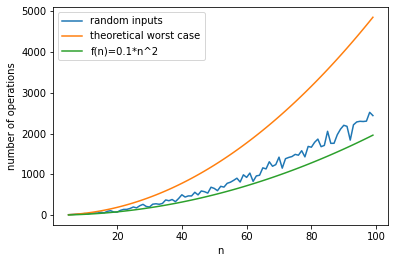

In [72]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)] 
y1=[n*(n-1)/2 for n in range(5,100)]
y2=[0.2 * n**2 for n in range(5,100)]
y=[]; 

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  counter=0; insertion_sort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["random inputs", "theoretical worst case", "f(n)=0.1*n^2"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

En el gráfico se puede apreciar que, como cabía de esperar, el tiempo de ejecución empírico esta por debajo del peor caso teórico. 

También podemos ver que el tiempo de ejecución para las instancias aleatorias pareciera tener una **cota asintótica inferior** $\Omega(n^2)$.

## Comparación con BubbleSort

En el siguiente gráfico se reporta una comparación en tiempo para el algoritmo **BubbleSort** y nuestra implementación del **InsertionSort** para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.



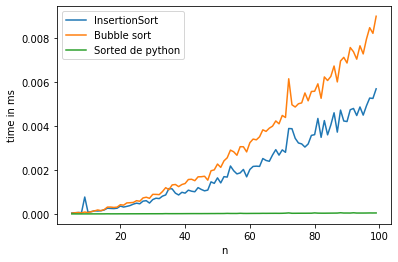

In [73]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]; y2=[]; y3=[]


#para tamaños del problema entre 5 y 99
for n in range(5,100):

  a = random.sample(range(1, 1000), n)

  t1 = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)
  t3 = repeat(setup="", stmt=f"sorted({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["InsertionSort", "Bubble sort", "Sorted de python"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En el gráfico se puede apreciar que las curvas de ambos algoritmos parecen ser $O(n^2)$. Sin embargo, **InsertionSort** reporta mejores tiempos para instancias generadas aleatoriamente. Esto se debe, probablemente, a que las **constantes ocultas tras la notación asintótica** son de menor tamaño.

Por otro lado, la función **sorted** de Python es mucho más rápida. Además que su cota asintótica probablemente sea menor: $O(n \log n)$, también se debe a que las funciones incorporadas con el lenguaje están **super optimizadas**.

### Análisis de rendimiento (Profiling)

Comúnmente llamado **profiling**, es la investigación del comportamiento de un programa usando información reunida desde el análisis dinámico del mismo. El objetivo es averiguar el tiempo dedicado a la ejecución de diferentes partes del programa para detectar los puntos problemáticos y las áreas dónde sea posible llevar a cabo una optimización del rendimiento (ya sea en velocidad o en consumo de recursos). Un profiler puede proporcionar distintas salidas, como una traza de ejecución o un resumen estadístico de los eventos observados.

A continuación, un par de comandos que pueden ser útiles cuando queramos realizar un análisis de nuestro programa cuando se ejecuta.

El comando %lprun, nos permite ver el tiempo total que usa nuestro algoritmo **en cada linea de código**.

In [74]:
import random
a = random.sample(range(1, 1000), 100)
%lprun -f insertion_sort insertion_sort(a)

Con `%memit` podemos saber el máximo de memoria que necesitó nuestro programa. El valor **increment** muestra la cantidad adicional de memoria que requiere nuestro programa.

In [77]:
%memit insertion_sort(a)

peak memory: 168.73 MiB, increment: 0.00 MiB
